In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv("dataset.csv")

In [10]:
df.head()

,study time,play time,result
0,9,10,pass
1,8,8,pass
2,3,9,fail
3,7,2,pass
4,9,6,pass


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['result']=encoder.fit_transform(df['result'])

In [12]:
df.head()

,study time,play time,result
0,9,10,1
1,8,8,1
2,3,9,0
3,7,2,1
4,9,6,1


In [13]:
df.tail()

,study time,play time,result
95,3,2,0
96,6,4,0
97,6,6,1
98,3,6,0
99,5,3,1


In [14]:
df.corr()

,study time,play time,result
study time,1.000000,0.018016,0.772577
play time,0.018016,1.000000,-0.130744
result,0.772577,-0.130744,1.000000


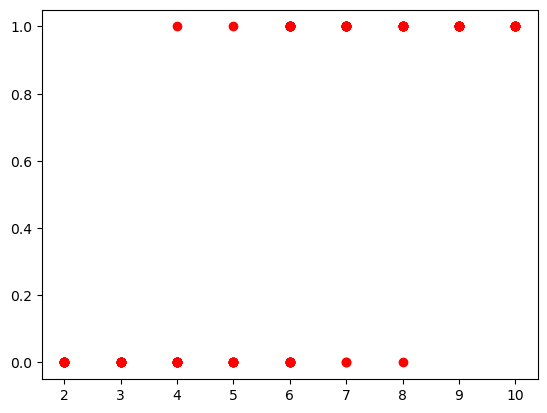

In [27]:

axes=plt.scatter(df['study time'],df['result'],c='red')


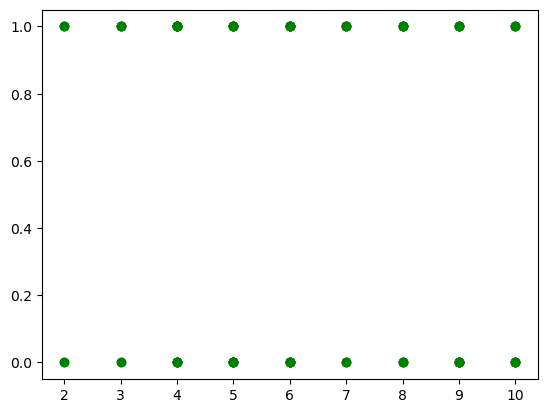

In [29]:
plt.scatter(df['play time'],df['result'],c='green')

In [37]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [38]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.3,random_state=42)

In [47]:
x_train.shape,y_train.shape

((70, 2), (70,))

In [48]:
x_test.shape,y_test.shape

((30, 2), (30,))

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
model.classes_

array([0, 1])

In [53]:
y_prediction=model.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_prediction))

[[ 9  2]
 [ 1 18]]


In [58]:
model.score(x_train,y_train)

0.8714285714285714

In [59]:
import pickle
model_pkl_file = "model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [67]:
model.predict([[2,9]])

array([0])